# 프로젝트 : 가위바위보 분류기 만들기

***

In [1]:
# 사용할 패키지 임포트

In [9]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [10]:
# 이미지 데이터 resize 하기

In [11]:
# 가위 이미지 읽어들이기

'''
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로 : ", image_dir_path)
'''

folders = ['rock_jpg', 'scissor_jpg', 'paper_jpg']

for fn in folders :
    image_dir_path = os.getenv("HOME") + "/rock_scissor_paper_training/" + fn
    print("이미지 디렉토리 경로 : ", image_dir_path)
    
    # 위 디렉토리에 있는 파일 중 .jpg 인 모든 파일 불러오기
    images = glob.glob(image_dir_path + "/*.png")
    # print(images)

    # 파일 별 28size 로 resize
    target_size = (28, 28)
    for img in images :
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img,"png")
        # print(new_img)

        # print("모든 이미지 resize 완료.")

이미지 디렉토리 경로 :  /home/aiffel/rock_scissor_paper_training/rock_jpg
이미지 디렉토리 경로 :  /home/aiffel/rock_scissor_paper_training/scissor_jpg
이미지 디렉토리 경로 :  /home/aiffel/rock_scissor_paper_training/paper_jpg


In [12]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2517   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=4
    
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size,color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path + '/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        print(file)
        
    for file in glob.iglob(img_path+'/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
    
folders_1 = ['rock', 'scissor', 'paper']

for fn in folders_1 :
    image_dir_path = os.getenv("HOME") + "/rock_scissor_paper_training/" + fn
    (x_train, y_train)=load_data(image_dir_path)
    x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

/home/aiffel/rock_scissor_paper_training/rock/rock01-085.png
/home/aiffel/rock_scissor_paper_training/rock/rock03-089.png
/home/aiffel/rock_scissor_paper_training/rock/rock05ck01-082.png
/home/aiffel/rock_scissor_paper_training/rock/rock01-068.png
/home/aiffel/rock_scissor_paper_training/rock/rock04-073.png
/home/aiffel/rock_scissor_paper_training/rock/rock01-041.png
/home/aiffel/rock_scissor_paper_training/rock/rock05ck01-044.png
/home/aiffel/rock_scissor_paper_training/rock/rock04-011.png
/home/aiffel/rock_scissor_paper_training/rock/rock07-k03-051.png
/home/aiffel/rock_scissor_paper_training/rock/rock02-068.png
/home/aiffel/rock_scissor_paper_training/rock/rock02-012.png
/home/aiffel/rock_scissor_paper_training/rock/rock03-038.png
/home/aiffel/rock_scissor_paper_training/rock/rock04-055.png
/home/aiffel/rock_scissor_paper_training/rock/rock01-069.png
/home/aiffel/rock_scissor_paper_training/rock/rock06ck02-064.png
/home/aiffel/rock_scissor_paper_training/rock/rock04-117.png
/home/ai

/home/aiffel/rock_scissor_paper_training/rock/rock07-k03-032.png
/home/aiffel/rock_scissor_paper_training/rock/rock01-038.png
/home/aiffel/rock_scissor_paper_training/rock/rock04-068.png
/home/aiffel/rock_scissor_paper_training/rock/rock02-049.png
/home/aiffel/rock_scissor_paper_training/rock/rock05ck01-096.png
/home/aiffel/rock_scissor_paper_training/rock/rock06ck02-042.png
/home/aiffel/rock_scissor_paper_training/rock/rock07-k03-105.png
/home/aiffel/rock_scissor_paper_training/rock/rock01-037.png
/home/aiffel/rock_scissor_paper_training/rock/rock02-047.png
/home/aiffel/rock_scissor_paper_training/rock/rock04-026.png
/home/aiffel/rock_scissor_paper_training/rock/rock01-048.png
/home/aiffel/rock_scissor_paper_training/rock/rock07-k03-027.png
/home/aiffel/rock_scissor_paper_training/rock/rock05ck01-106.png
/home/aiffel/rock_scissor_paper_training/rock/rock03-020.png
/home/aiffel/rock_scissor_paper_training/rock/rock03-013.png
/home/aiffel/rock_scissor_paper_training/rock/rock03-095.png


/home/aiffel/rock_scissor_paper_training/scissor/scissors02-077.png
/home/aiffel/rock_scissor_paper_training/scissor/scissors01-061.png
/home/aiffel/rock_scissor_paper_training/scissor/scissors01-104.png
/home/aiffel/rock_scissor_paper_training/scissor/scissors03-105.png
/home/aiffel/rock_scissor_paper_training/scissor/scissors04-092.png
학습데이터(x_train)의 이미지 개수는 2517 입니다.
/home/aiffel/rock_scissor_paper_training/paper/paper02-069.png
/home/aiffel/rock_scissor_paper_training/paper/paper04-085.png
/home/aiffel/rock_scissor_paper_training/paper/paper06-033.png
/home/aiffel/rock_scissor_paper_training/paper/paper02-061.png
/home/aiffel/rock_scissor_paper_training/paper/paper01-105.png
/home/aiffel/rock_scissor_paper_training/paper/paper06-066.png
/home/aiffel/rock_scissor_paper_training/paper/paper04-104.png
/home/aiffel/rock_scissor_paper_training/paper/paper05-008.png
/home/aiffel/rock_scissor_paper_training/paper/paper05-028.png
/home/aiffel/rock_scissor_paper_training/paper/paper07-031.

학습데이터(x_train)의 이미지 개수는 2517 입니다.
x_train shape: (2517, 28, 28, 4)
y_train shape: (2517,)


라벨:  0


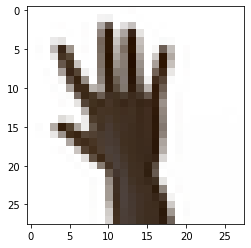

In [13]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [14]:
# 딥러닝 네트워크 구성

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28, 28, 4)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print('Model에 추가된 Layer 개수 : ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수 :  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        592       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (N

In [15]:
# 딥러닝 학습하기

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 4s 55ms/step - loss: 1.1046 - accuracy: 0.3357
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 1.0997 - accuracy: 0.3282
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 1.0993 - accuracy: 0.3238
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.3166
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.3242
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.3206
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3182
Epoch 8/10
79/79 [==============================] - 0s 3ms/step - loss: 1.0988 - accuracy: 0.3302
Epoch 9/10
79/79 [==============================] - 0s 2ms/step - loss: 1.0988 - accuracy: 0.3198
Epoch 10/10
79/79 [==============================] - 0s 2ms/step - loss: 1.0988 - accuracy: 0.3222


In [16]:
# 테스트 셋으로 확인해보기

In [17]:
# 테스트 데이터 파일 resize 하기

#folders = ['rock', 'scissor', 'paper']

for fn in folders :
    image_dir_path = os.getenv("HOME") + "/rock_scissor_paper_test/" + fn
    print("이미지 디렉토리 경로 : ", image_dir_path)
    
    # 위 디렉토리에 있는 파일 중 .jpg 인 모든 파일 불러오기
    images = glob.glob(image_dir_path + "/*.png")
    # print(images)

    # 파일 별 28size 로 resize
    target_size = (28, 28)
    for img in images :
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img,"png")
        # print(new_img)

        # print("모든 이미지 resize 완료.")

이미지 디렉토리 경로 :  /home/aiffel/rock_scissor_paper_test/rock_jpg
이미지 디렉토리 경로 :  /home/aiffel/rock_scissor_paper_test/scissor_jpg
이미지 디렉토리 경로 :  /home/aiffel/rock_scissor_paper_test/paper_jpg


In [18]:
# 테스트 데이터 셋 만들기

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2517   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=4
    
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size,color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path + '/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        print(file)
        
    for file in glob.iglob(img_path+'/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
    
folders_1 = ['rock', 'scissor', 'paper']

for fn in folders_1 :
    image_dir_path = os.getenv("HOME") + "/rock_scissor_paper_test/" + fn
    (x_test, y_test)=load_data(image_dir_path)
    x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

/home/aiffel/rock_scissor_paper_test/rock/testrock04-13.png
/home/aiffel/rock_scissor_paper_test/rock/testrock02-14.png
/home/aiffel/rock_scissor_paper_test/rock/testrock02-25.png
/home/aiffel/rock_scissor_paper_test/rock/testrock02-29.png
/home/aiffel/rock_scissor_paper_test/rock/testrock03-03.png
/home/aiffel/rock_scissor_paper_test/rock/testrock01-07.png
/home/aiffel/rock_scissor_paper_test/rock/testrock04-12.png
/home/aiffel/rock_scissor_paper_test/rock/testrock03-12.png
/home/aiffel/rock_scissor_paper_test/rock/testrock04-04.png
/home/aiffel/rock_scissor_paper_test/rock/testrock02-21.png
/home/aiffel/rock_scissor_paper_test/rock/testrock04-26.png
/home/aiffel/rock_scissor_paper_test/rock/testrock03-02.png
/home/aiffel/rock_scissor_paper_test/rock/testrock03-28.png
/home/aiffel/rock_scissor_paper_test/rock/testrock01-04.png
/home/aiffel/rock_scissor_paper_test/rock/testrock04-29.png
/home/aiffel/rock_scissor_paper_test/rock/testrock01-29.png
/home/aiffel/rock_scissor_paper_test/roc

테스트 데이터(x_test)의 이미지 개수는 372 입니다.
x_test shape: (2517, 28, 28, 4)
y_test shape: (2517,)


In [19]:
# 테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [20]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

79/79 - 0s - loss: 1.0978 - accuracy: 0.9015
test_loss: 1.0978277921676636 
test_accuracy: 0.9014700055122375
